In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import streamlit as st

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import  Sequential

In [15]:
st.title('Stock and Cryptcurrency Price Prediction')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
#stock_name1=st.selectbox(('TSLA'),('AAPL'))
stock_name=st.text_input("Enter Any Stock",'TCS.NS')
future_day=st.number_input("Enter Number of Days",1)

In [17]:
#against_currency='INR'

In [18]:
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

In [19]:
#Taking data from web using yahoo finanace API
data = web.DataReader(f'{stock_name}','yahoo',start,end)

In [20]:
#data = pd.read_csv('LIVE DATA.xlsx')
#prepare data
print(data)

                   High          Low         Open        Close     Volume  \
Date                                                                        
2018-01-01  1347.400024  1317.500000  1341.150024  1322.800049  1351760.0   
2018-01-02  1334.800049  1310.099976  1330.000000  1315.599976  1920290.0   
2018-01-03  1334.500000  1315.599976  1316.000000  1319.324951  1257120.0   
2018-01-04  1331.000000  1320.000000  1325.000000  1328.550049   913082.0   
2018-01-05  1349.750000  1325.000000  1325.000000  1344.599976  1153706.0   
...                 ...          ...          ...          ...        ...   
2022-02-16  3854.100098  3806.000000  3844.000000  3813.100098  3256906.0   
2022-02-17  3835.000000  3779.000000  3825.000000  3784.199951  3134372.0   
2022-02-18  3815.949951  3757.600098  3769.000000  3793.899902  3688883.0   
2022-02-21  3827.800049  3705.550049  3810.000000  3719.399902  7465922.0   
2022-02-22  3667.899902  3586.000000  3650.000000  3594.949951  1473930.0   

In [21]:
#feature scaling
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(data['Close'].values.reshape(-1,1))

In [22]:
prediction_days=14
#future_day=2

In [23]:
x_train,y_train=[],[]
for x in range(prediction_days,len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])

In [24]:
x_train,y_train= np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [25]:
#CREATING A NEURAL NETWORK

In [26]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.4))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0543
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 7/10
32/32 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0071


In [28]:
#TESTING THE MODEL

In [29]:
test_start=dt.datetime(2021,1,1)
test_end=dt.datetime.now()
test_data = web.DataReader(f'{stock_name}','yahoo',test_start,test_end)
actual_prices=test_data['Close'].values

In [30]:
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

In [31]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scalar.fit_transform(model_inputs)

In [32]:
x_test=[]

In [33]:
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [34]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
prediction_prices=model.predict(x_test)
prediction_prices=scalar.inverse_transform(prediction_prices)

In [36]:
#plotting the graph

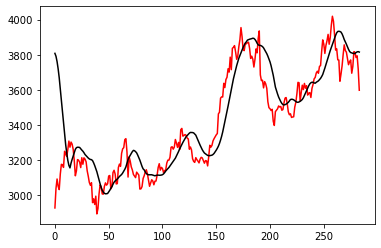

In [37]:
plt.plot(actual_prices,color='red',label='Predicted Price')
plt.plot(prediction_prices,color='black',label='Actual Price')

2022-02-22 09:58:08.477 No handles with labels found to put in legend.


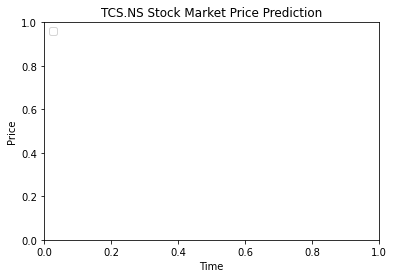

In [38]:
plt.title('Stock Market Price Prediction')
plt.title(stock_name +" Stock Market Price Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [39]:
#PREDICT THE NEXT DAY

In [40]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs)+1,0]]     
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [41]:
prediction=model.predict(real_data)
prediction= scalar.inverse_transform(prediction)
print(stock_name +" Predicted Price is : Rs.",prediction)

2022-02-22 09:58:53.722 Model was constructed with shape (None, 14, 1) for input Tensor("lstm_input:0", shape=(None, 14, 1), dtype=float32), but it was called on an input with incompatible shape (None, 13, 1).


TCS.NS Predicted Price is : Rs. [[3765.6755]]


In [42]:
#describing data

In [43]:
#st.write(data.describe()

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

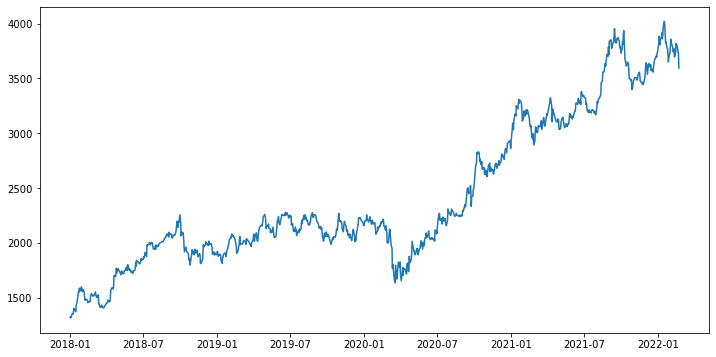

In [44]:
st.subheader(stock_name + ' Predicted Price of is Rs.' )
st.subheader(prediction)
fig =plt.figure(figsize=(12,6))
plt.plot(data.Close)
st.pyplot(fig)

In [45]:
#plt.plot(actual_prices,color='red',label='Predicted Price')
#plt.plot(prediction_prices,color='black',label='Actual Price')

In [46]:
st.subheader('Predicted Price vs Original Price')
ma100 = data.Close.rolling(100).mean()

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

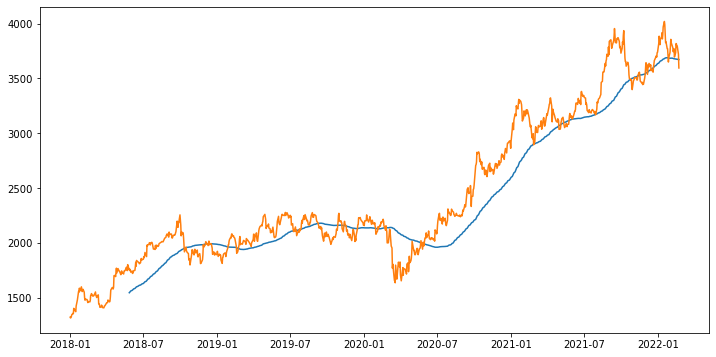

In [47]:
fig =plt.figure(figsize=(12,6))
plt.plot(ma100)
plt.plot(data.Close)
st.pyplot(fig)

In [48]:
st.write(data.describe())